# Energy Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("../datsets/dataset2/HomeA-electrical/HomeA/2014/HomeA-meter2_2014.csv", delimiter = ',')
df1['Date & Time']= pd.to_datetime(df1['Date & Time'], format='%Y-%m-%d %H:%M:%S')
df1 = df1.set_index(df1['Date & Time'])
df1 = df1[~df1.index.duplicated(keep='first')]
df1 = df1.drop(['Date & Time'], axis=1)
df1 = df1.drop(['use [kW]'], axis=1)
df1 = df1.drop(['gen [kW]'], axis=1)
df1



,FurnaceHRV [kW],CellarOutlets [kW],WashingMachine [kW],FridgeRange [kW],DisposalDishwasher [kW],KitchenLights [kW],BedroomOutlets [kW],BedroomLights [kW],MasterOutlets [kW],MasterLights [kW],DuctHeaterHRV [kW]
Date & Time,,,,,,,,,,,
2014-01-01 00:00:00,0.195338,0.083204,0.005686,0.006892,0.005569,0.012154,0.020452,0.004899,0.046563,0.010393,0.382682
2014-01-01 00:30:00,0.182158,0.036139,0.005679,0.094138,0.005412,0.005200,0.020571,0.008869,0.051677,0.009884,0.275576
2014-01-01 01:00:00,0.134808,0.047034,0.005635,0.014786,0.005510,0.003173,0.020516,0.004901,0.053619,0.010183,0.346067
2014-01-01 01:30:00,0.182125,0.071407,0.005672,0.082081,0.005445,0.003072,0.020506,0.004844,0.050543,0.009996,0.310117
2014-01-01 02:00:00,0.092988,0.014203,0.005570,0.031901,0.005401,0.003154,0.020412,0.004841,0.049052,0.009927,0.309781
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 21:30:00,0.075843,0.064897,0.000071,0.000063,0.000050,0.000017,0.011409,0.004720,0.013031,0.008959,0.036259
2014-12-31 22:00:00,0.170588,0.022284,0.000154,0.000083,0.000061,0.000017,0.011306,0.004711,0.012863,0.008929,0.033916
2014-12-31 22:30:00,0.148785,0.072169,0.000156,0.000074,0.000056,0.000016,0.011294,0.004712,0.012853,0.008907,0.033669


In [3]:
df2 = pd.read_csv("../datsets/dataset2/HomeA-electrical/HomeA/2014/HomeA-meter3_2014.csv", delimiter = ',')
df2['Date & Time']= pd.to_datetime(df2['Date & Time'], format='%Y-%m-%d %H:%M:%S')
df2 = df2.set_index(df2['Date & Time'])
df2 = df2[~df2.index.duplicated(keep='first')]
df2 = df2[['ElectricRange [kW]', 'Dryer [kW]', 'GarageMudroomLights [kW]']]
df2


,ElectricRange [kW],Dryer [kW],GarageMudroomLights [kW]
Date & Time,,,
2014-01-01 00:00:00,0.002883,0.005231,0.013155
2014-01-01 00:30:00,0.003022,0.005441,0.012962
2014-01-01 01:00:00,0.002979,0.005293,0.013107
2014-01-01 01:30:00,0.002955,0.005317,0.012978
2014-01-01 02:00:00,0.003059,0.005368,0.012886
...,...,...,...
2014-12-31 21:30:00,0.000051,0.000158,0.001182
2014-12-31 22:00:00,0.000064,0.000199,0.001236
2014-12-31 22:30:00,0.000059,0.000183,0.001211


In [ ]:
df3 = pd.read_csv("../datsets/dataset2/HomeA-weather/HomeA/homeA2014.csv", delimiter = ',')


In [4]:
df = pd.concat([df1, df2], axis=1)
df.loc[:,'use'] = df.sum(axis=1)

#Retirar [kW]
df.columns = [col.replace(' [kW]', '') for col in df.columns]
df


,FurnaceHRV,CellarOutlets,WashingMachine,FridgeRange,DisposalDishwasher,KitchenLights,BedroomOutlets,BedroomLights,MasterOutlets,MasterLights,DuctHeaterHRV,ElectricRange,Dryer,GarageMudroomLights,use
Date & Time,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.195338,0.083204,0.005686,0.006892,0.005569,0.012154,0.020452,0.004899,0.046563,0.010393,0.382682,0.002883,0.005231,0.013155,0.795101
2014-01-01 00:30:00,0.182158,0.036139,0.005679,0.094138,0.005412,0.005200,0.020571,0.008869,0.051677,0.009884,0.275576,0.003022,0.005441,0.012962,0.716727
2014-01-01 01:00:00,0.134808,0.047034,0.005635,0.014786,0.005510,0.003173,0.020516,0.004901,0.053619,0.010183,0.346067,0.002979,0.005293,0.013107,0.667612
2014-01-01 01:30:00,0.182125,0.071407,0.005672,0.082081,0.005445,0.003072,0.020506,0.004844,0.050543,0.009996,0.310117,0.002955,0.005317,0.012978,0.767058
2014-01-01 02:00:00,0.092988,0.014203,0.005570,0.031901,0.005401,0.003154,0.020412,0.004841,0.049052,0.009927,0.309781,0.003059,0.005368,0.012886,0.568542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 21:30:00,0.075843,0.064897,0.000071,0.000063,0.000050,0.000017,0.011409,0.004720,0.013031,0.008959,0.036259,0.000051,0.000158,0.001182,0.216711
2014-12-31 22:00:00,0.170588,0.022284,0.000154,0.000083,0.000061,0.000017,0.011306,0.004711,0.012863,0.008929,0.033916,0.000064,0.000199,0.001236,0.266411
2014-12-31 22:30:00,0.148785,0.072169,0.000156,0.000074,0.000056,0.000016,0.011294,0.004712,0.012853,0.008907,0.033669,0.000059,0.000183,0.001211,0.294144


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17518 entries, 2014-01-01 00:00:00 to 2014-12-31 23:30:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FurnaceHRV           17518 non-null  float64
 1   CellarOutlets        17518 non-null  float64
 2   WashingMachine       17518 non-null  float64
 3   FridgeRange          17518 non-null  float64
 4   DisposalDishwasher   17518 non-null  float64
 5   KitchenLights        17518 non-null  float64
 6   BedroomOutlets       17518 non-null  float64
 7   BedroomLights        17518 non-null  float64
 8   MasterOutlets        17518 non-null  float64
 9   MasterLights         17518 non-null  float64
 10  DuctHeaterHRV        17518 non-null  float64
 11  ElectricRange        17518 non-null  float64
 12  Dryer                17518 non-null  float64
 13  GarageMudroomLights  17518 non-null  float64
 14  use                  17518 non-null  float64
dtypes

In [6]:
#GROUP DATA PER HOUR INTERVAL

#data  is in KwH, basta fazer a media
df = df.resample('H').sum()

df.dropna()

#SOME FEATURES THAT MIGHT BE IMPORTANT
#df['month'] = df.index.month
#df['weekday'] = df.index.day
#df['hour'] = df.index.hour

df

,FurnaceHRV,CellarOutlets,WashingMachine,FridgeRange,DisposalDishwasher,KitchenLights,BedroomOutlets,BedroomLights,MasterOutlets,MasterLights,DuctHeaterHRV,ElectricRange,Dryer,GarageMudroomLights,use
Date & Time,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.377496,0.119343,0.011365,0.101030,0.010981,0.017354,0.041022,0.013768,0.098240,0.020277,0.658258,0.005905,0.010672,0.026117,1.511828
2014-01-01 01:00:00,0.316933,0.118441,0.011307,0.096867,0.010955,0.006245,0.041022,0.009746,0.104162,0.020178,0.656184,0.005934,0.010610,0.026086,1.434669
2014-01-01 02:00:00,0.223644,0.084956,0.011172,0.086714,0.010858,0.006230,0.040796,0.009681,0.097835,0.020004,0.651067,0.006001,0.010637,0.025790,1.285386
2014-01-01 03:00:00,0.137059,0.083013,0.011119,0.089537,0.010865,0.006262,0.041064,0.009692,0.097447,0.020066,0.647164,0.006051,0.010739,0.025949,1.196028
2014-01-01 04:00:00,0.149081,0.077003,0.011129,0.089556,0.010937,0.008889,0.041283,0.009739,0.097614,0.020171,0.649417,0.006074,0.010813,0.026121,1.207828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,0.394702,0.087981,0.000528,0.000182,0.000128,0.000033,0.022691,0.009406,0.025549,0.017773,0.069872,0.000137,0.000427,0.002498,0.631907
2014-12-31 20:00:00,0.389038,0.116382,0.000524,0.000180,0.000129,0.000034,0.022576,0.009417,0.025789,0.017872,0.070121,0.000135,0.000420,0.002500,0.655119
2014-12-31 21:00:00,0.261958,0.118776,0.000333,0.000150,0.000115,0.000034,0.022759,0.009442,0.025984,0.017921,0.071428,0.000118,0.000365,0.002429,0.531813


## Visualisations

<AxesSubplot:title={'center':'Energy use'}, xlabel='Date & Time'>

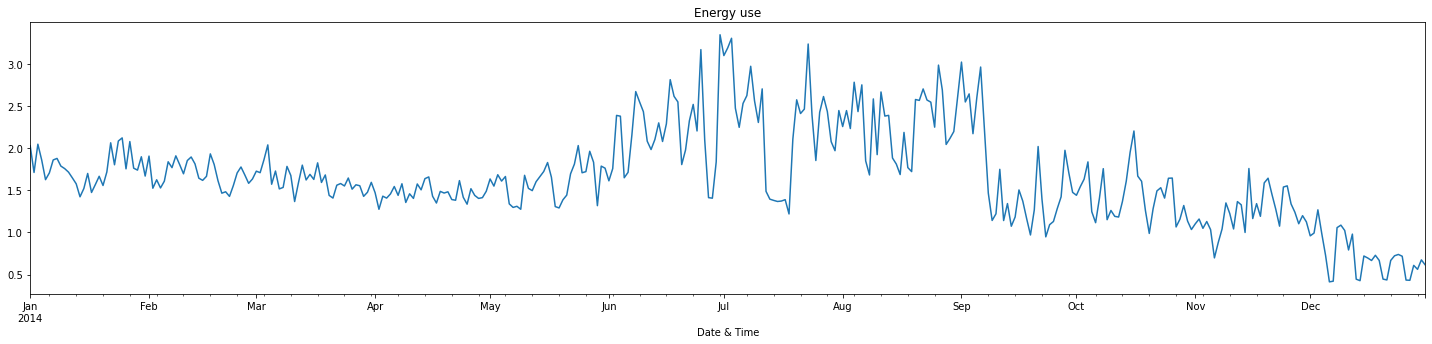

In [7]:
df['use'].resample(rule='D').mean().plot(figsize=(25,5), title="Energy use")    #group by day

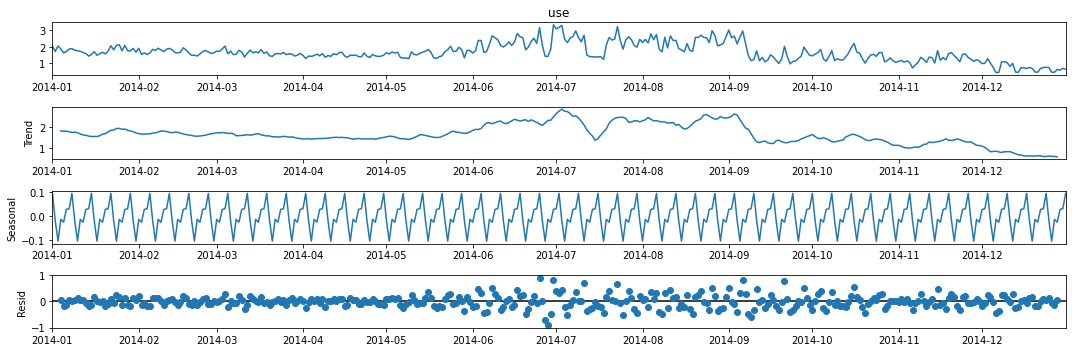

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rc("figure", figsize=(15,5))

results = seasonal_decompose(df['use'].resample(rule='D').mean())
fig = results.plot()


# Feature Selection

[16:40:12] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




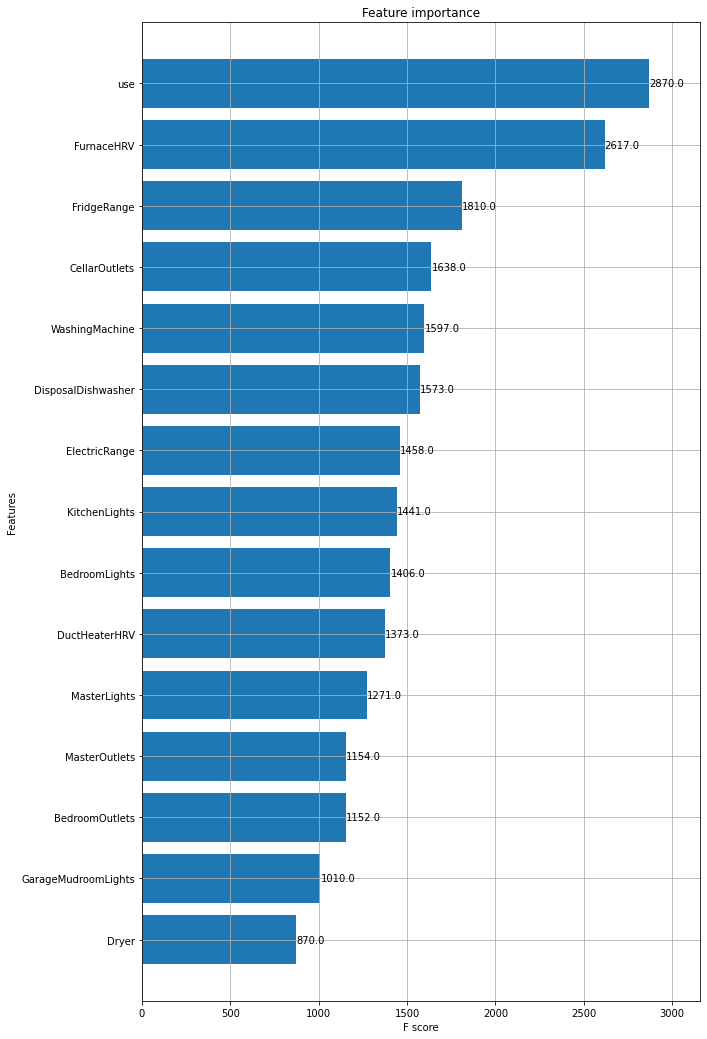

In [9]:
import xgboost as xgb

use = df["use"].values
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(df, use, feature_names=df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

importance = model.get_score(importance_type='weight')
tuples = sorted([(k, importance[k]) for k in importance], key=lambda x: x[1], reverse=True)
xgb_imp_f = [x[0] for x in tuples]

feature_selection = xgb_imp_f[:10]

# Help Functions

In [10]:
#Apply a scaler to the data

def scale(scaler, x_train, y_train, x_test, x_val=None, y_val=None):
    x_scaler = scaler()
    x_train = x_scaler.fit_transform(x_train)
    x_test = x_scaler.transform(x_test)
   
    y_scaler = scaler()
    y_train = y_scaler.fit_transform(y_train)
    
    if x_val is not None:
        x_val = x_scaler.transform(x_val)
        y_val = y_scaler.transform(y_val)
    
        return x_train, y_train, x_test, x_val, y_val,x_scaler, y_scaler

    return x_train, y_train, x_test, x_scaler, y_scaler
    


In [11]:
def predict_evaluate(model, x_test, y_scaler, y_test_UnScalled, graphName = 'Energy Usage Prediction', showplots=False):
    prediction = model.predict(x_test).reshape(-1, 1)
    prediction = y_scaler.inverse_transform(prediction)
    
    #equalTest = 7*24 - (24*30-len(prediction))
    #prediction = prediction[equalTest:]
    #y_test_UnScalled = y_test_UnScalled[equalTest:]
    

    diff = [abs(prediction[i]-y_test_UnScalled[i]) for i in range(len(prediction))]
    
    resultingPlot = plt.figure(figsize=(25,10))
    plt.plot(y_test_UnScalled, color='red', label='Original Usage')
    plt.plot(prediction, color='blue', label='Predicted Usage')
    plt.plot(diff, color='green', label='Error')
    plt.title(graphName)
    plt.ylabel('kW')
    plt.legend()
    
    mape = mean_absolute_percentage_error(y_test_UnScalled, prediction)
    mae = mean_absolute_error(y_test_UnScalled, prediction)
    maxae = max(diff)[0]
    mse = mean_squared_error(y_test_UnScalled, prediction)
    
    if showplots:
        plt.show()
        print("Mean Absolute Percentage Error: ", mape)
        print("Mean Absolute Error: ", mae)
        print("Max Absolute Error: ", maxae)
        print("Mean Squared Error: ", mse)
    
    return {"name":graphName, "resultingPlot": resultingPlot, "mape":mape, "mae":mae, "maxae":maxae, "mse":mse}

# LSTM

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, MaxPooling2D, Conv2D, TimeDistributed, Flatten
from keras.callbacks import EarlyStopping

def define_model(past_window, num_features):
    
    #OPTIMIZAVEL
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True,input_shape=(past_window, num_features)))
    model.add(LSTM(units=64))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_absolute_error')
    #model.summary()
    
    return model

def train(model, train_generator, val_generator, showplot=False):
    early_stopping = EarlyStopping(monitor="val_loss", 
                                   patience=5, 
                                   mode="min")
    
    history = model.fit(train_generator, 
                                  epochs=32,
                                  validation_data=val_generator, 
                                  shuffle = False, 
                                  callbacks=[early_stopping],
                                  verbose=0
                                   )
    
    loss_per_epoch = history.history['loss']
    
    if showplot:
        plt.plot(range(len(loss_per_epoch)), loss_per_epoch)


def make_lstm(df, featuresNames, targetName, past_window, name='Energy Usage Prediction', showplots=False):
    num_features = len(featuresNames)
    
    features = df[featuresNames]
    target = df[targetName]
    
    #DIVIDIR EM TREINO/TESTE
    x_train, x_test, y_train, y_test = train_test_split(features.values,target.values.reshape(-1, 1), test_size=24*30, shuffle=False)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05, shuffle=False)
   
    y_test_UnScalled = y_test[past_window:] #GUARDAR PARA COMPARAR RESULTADOS

    #SCALE
    x_train, y_train, x_test, x_val, y_val, x_scaler, y_scaler = scale(MinMaxScaler, x_train, y_train, x_test, x_val, y_val)
    
    
    batch_size=64
    train_generator = TimeseriesGenerator(x_train, y_train, length=past_window, batch_size=batch_size)
    val_generator = TimeseriesGenerator(x_val, y_val, length=past_window, batch_size=batch_size)
    test_generator = TimeseriesGenerator(x_test, y_test, length=past_window, batch_size=batch_size)

    model = define_model(past_window, num_features)
    train(model, train_generator, val_generator)

    return predict_evaluate(model, test_generator, y_scaler, y_test_UnScalled, graphName=name, showplots=showplots)


## Evaluate a bunch of LSTMs

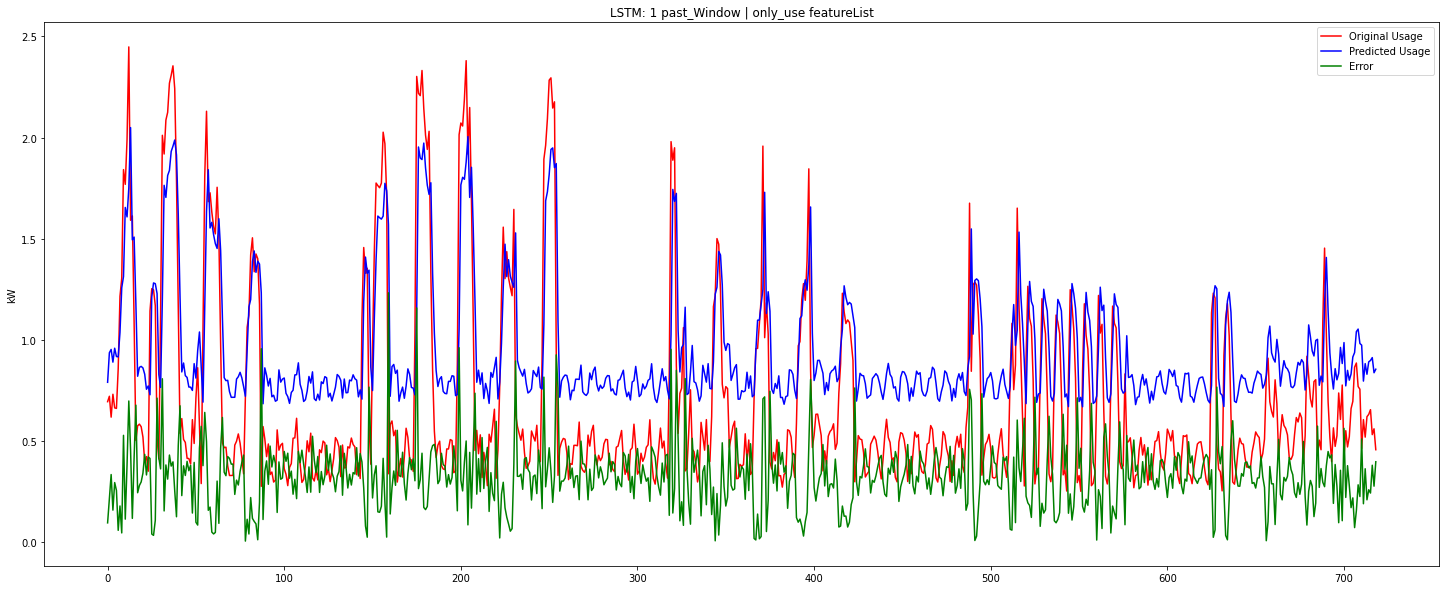

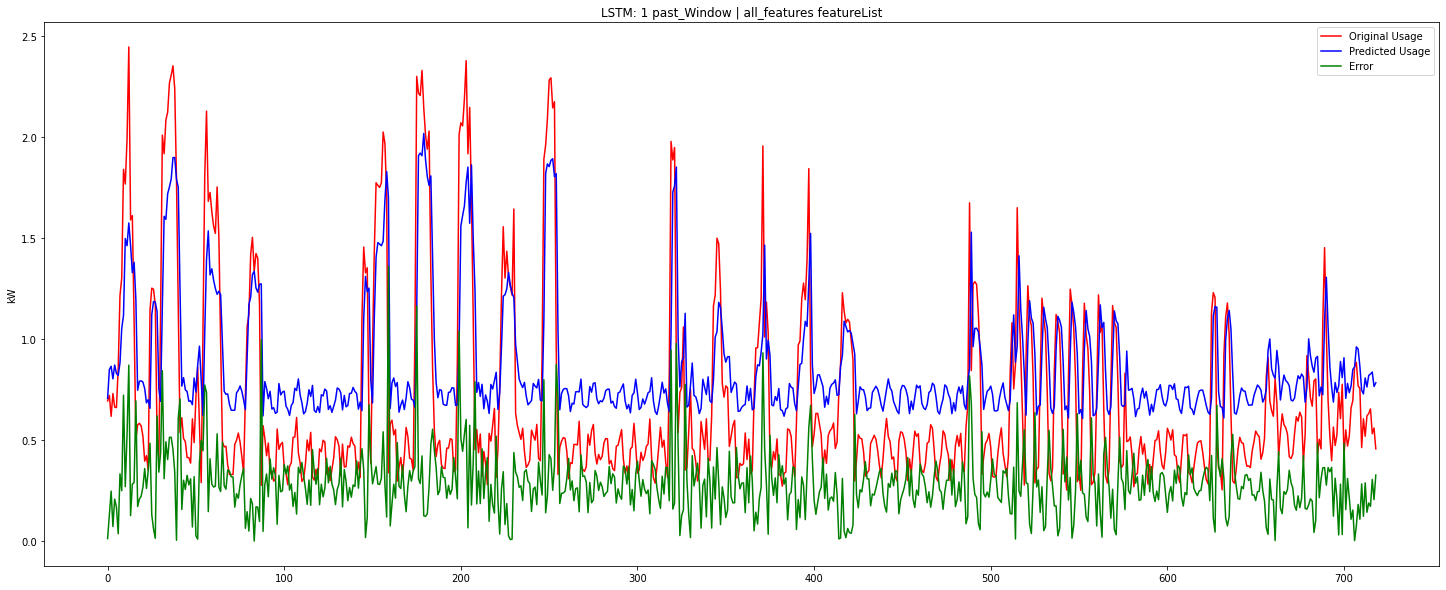

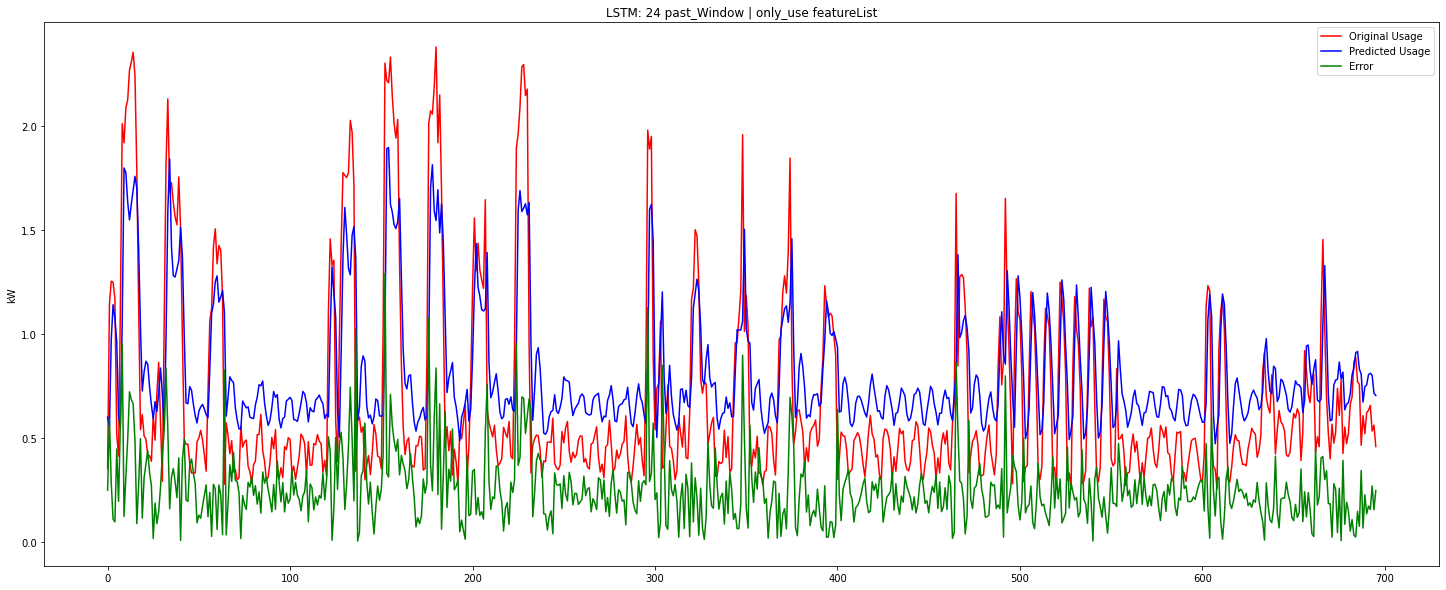

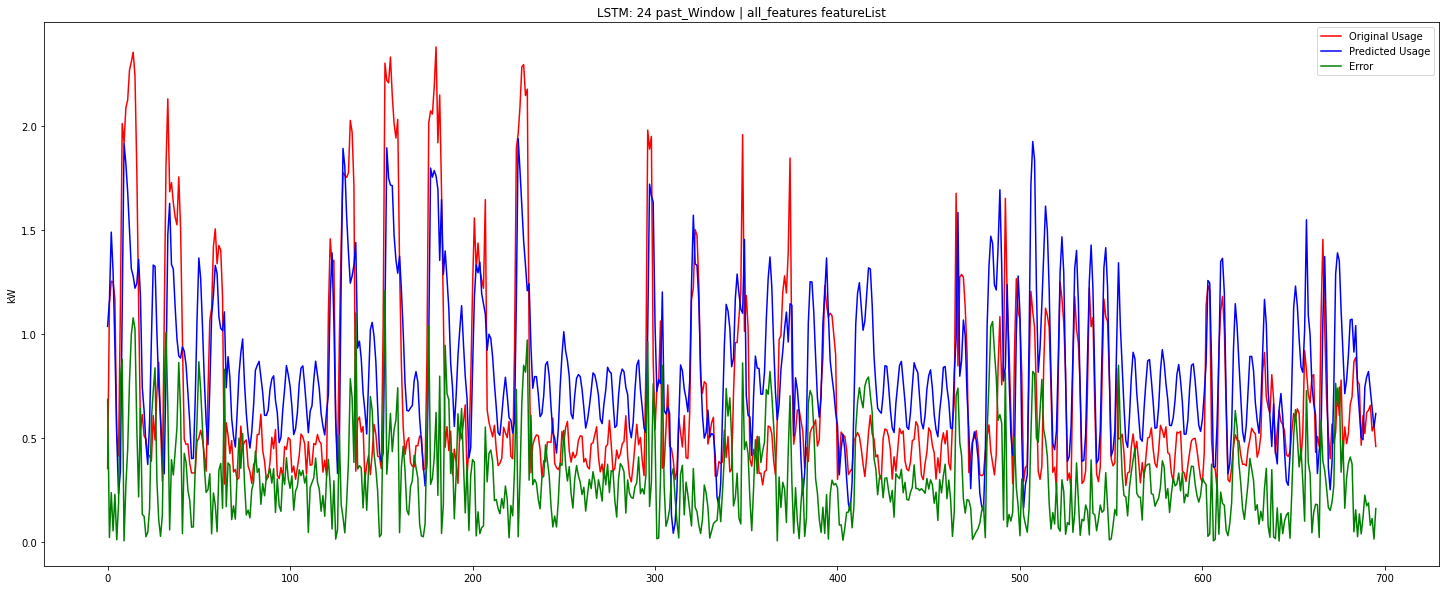

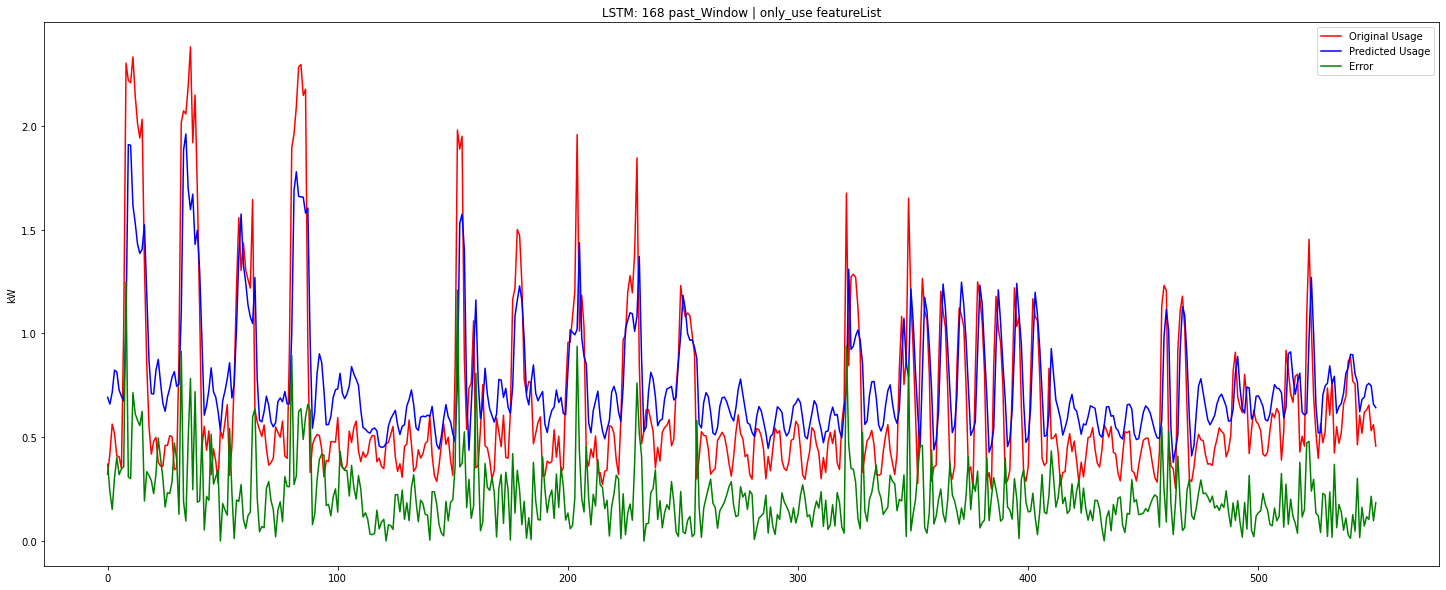

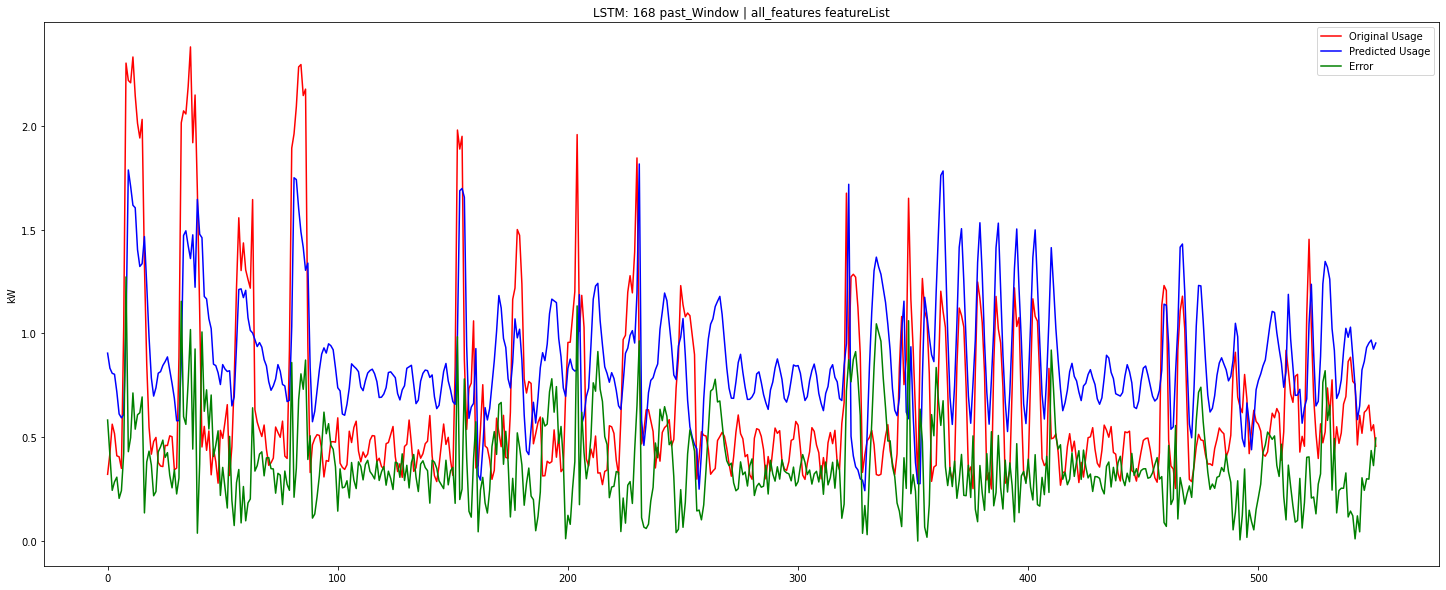

In [13]:
TARGET_NAME = "use"
PAST_WINDOWS = [1, 24, 24*7]
FEATURE_NAMES = {"only_use": ["use"],
                 "all_features":list(df.columns)}

results = []

for past_window in PAST_WINDOWS:
    for featuresName, featurelist in FEATURE_NAMES.items():
        
        name = "LSTM: " + str(past_window) + " past_Window | " + featuresName + " featureList"
        result = make_lstm(df, featurelist, TARGET_NAME, past_window, name)     
        
        results.append(result)

In [14]:
from prettytable import PrettyTable

results.sort(key=lambda x: x['mape'])
t = PrettyTable(['Name', 'mape', 'mae', 'maxae', 'mse'])

for r in results:
    t.add_row([r['name'], round(r['mape'], 3), round(r['mae'], 3), round(r['maxae'], 3), round(r['mse'], 3)])

print(t)


+--------------------------------------------------+-------+-------+-------+-------+
|                       Name                       |  mape |  mae  | maxae |  mse  |
+--------------------------------------------------+-------+-------+-------+-------+
|   LSTM: 168 past_Window | only_use featureList   | 0.409 | 0.216 | 1.249 | 0.074 |
|   LSTM: 24 past_Window | only_use featureList    | 0.481 | 0.252 | 1.289 | 0.091 |
| LSTM: 24 past_Window | all_features featureList  | 0.553 | 0.301 | 1.209 |  0.14 |
|  LSTM: 1 past_Window | all_features featureList  | 0.569 | 0.284 | 1.361 | 0.107 |
|    LSTM: 1 past_Window | only_use featureList    | 0.681 | 0.327 | 1.232 | 0.133 |
| LSTM: 168 past_Window | all_features featureList | 0.718 | 0.367 | 1.272 | 0.177 |
+--------------------------------------------------+-------+-------+-------+-------+


# SVR

In [ ]:
from sklearn.svm import SVR

def make_svr(df, featuresNames, targetName, past_window, svr_kernel, checkParams=False,name='Energy Usage Prediction', showplots=False):
    num_features = len(featuresNames)
    
    #SEPARATE INTO TRAIN / TEST
    features = df[featuresNames]
    target = df[targetName]
    x_train, x_test, y_train, y_test = train_test_split(features.values,target.values.reshape(-1, 1), test_size=24*30, shuffle=False)
    y_test_UnScalled = y_test[past_window:]
    
    #SCALE
    x_train, y_train, x_test, x_scaler, y_scaler = scale(StandardScaler, x_train, y_train, x_test)
    
    #TIME SERIES FORMAT
    batch_size=1
    train_generator = TimeseriesGenerator(x_train, y_train, length=past_window, batch_size=batch_size)
    test_generator = TimeseriesGenerator(x_test, y_test, length=past_window, batch_size=batch_size)
    svr_x_Train = [arr[0].flatten() for arr in train_generator]
    svr_y_Train = [arr[1].flatten() for arr in train_generator]
    svr_x_Test = [arr[0].flatten() for arr in test_generator]
    
    #TRAIN
    regressor = SVR(kernel = svr_kernel)  
    if checkParams:
        params = {"C":[0.1, 1, 10], "gamma": [0.1, 0.01, 0.001]}
        regressor = GridSearchCV(regressor, params)
        regressor.fit(svr_x_Train, svr_y_Train)
        print(regressor.best_params_)
    else:
        regressor.fit(svr_x_Train, svr_y_Train)
    
    #PREDICT
    return predict_evaluate(regressor, svr_x_Test, y_scaler, y_test_UnScalled, graphName=name, showplots=showplots)
    

## Evaluate a bunch of SVRs

In [ ]:
TARGET_NAME = "use"
PAST_WINDOWS = [1, 24, 7*24]
FEATURE_NAMES = {"only_use": ["use"],
                 "feature_selection":feature_selection}  #TODAS AS FEATURES DEMORA MUITO TEMPO
KERNELS = ["linear","rbf"]

resultsSVR = []
for kernel in KERNELS:
    for past_window in PAST_WINDOWS:
        for featuresName, featurelist in FEATURE_NAMES.items():
            if past_window == 24*7 and featuresName != "only_use": #DEMORA DEMASIADO TEMPO
                continue
            
            t1= time.time()
            name = "SVR: " + kernel + " | " + str(past_window) + " past_Window | " + featuresName + " featureList"
            result = make_svr(df, featurelist, TARGET_NAME, past_window, kernel,name=name)     
            result['time']=time.time()-t1
            
            resultsSVR.append(result)


In [ ]:
from prettytable import PrettyTable

resultsSVR.sort(key=lambda x: x['mape'])
t = PrettyTable(['Name', 'mape', 'mae', 'maxae', 'mse'])

for r in resultsSVR:
    t.add_row([r['name'], round(r['mape'], 3), round(r['mae'], 3), round(r['maxae'], 3), round(r['mse'], 3)])

print(t)

1 semana de past window foi avaliada apenas com informação do uso porque com mais features demora demasiado tempo.  
Melhor SVR tem 24 horas de past window e apenas usa o consumo energético. Este modelo é melhor que a melhor LSTM

# ARIMA

ARIMA não foi testado a fundo nem com uma dimenção de teste tão grande como nos outros algoritmos porque demora muito tempo e numa fase inicial mostrou ter resultados piores

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

train = [x for x in df["use"][:-300].values]
test = [x for x in df["use"][-300:].values]

prediction = list()
for t in range(len(test)):
    model = ARIMA(train, order=(5,1,0))
    model = model.fit()
    pred = model.forecast()[0]

    prediction.append(pred)
    train.append(test[t])
    print('progress:%',round(100*(t/len(test))), end="\r")


In [ ]:
diff = [abs(prediction[i]-test[i]) for i in range(len(prediction))]

plt.figure(figsize=(25,10))
plt.plot(test, color='red', label='Original Usage')
plt.plot(prediction, color='blue', label='Predicted Usage')
plt.plot(diff, color='green', label='Error')
plt.title("ARIMA")
plt.ylabel('kW')
plt.legend()
plt.show

mape = mean_absolute_percentage_error(test, prediction)
mae = mean_absolute_error(test, prediction)
maxae = max(diff)
mse = mean_squared_error(test, prediction)
print("Mean Absolute Percentage Error: ", mape)
print("Mean Absolute Error: ", mae)
print("Max Absolute Error: ", maxae)
print("Mean Squared Error: ", mse)